In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
X, y = make_blobs(centers=3, random_state=42)

In [3]:
import random

In [4]:
# Every cluster has a center point and points associated to it
class Cluster:
    def __init__(self, center):
        self.center=center
        self.points=[]
        
    def distance(self, point):
        return np.sqrt(np.sum((point - self.center)**2))
        
class CustomKMeans:
    def __init__(self, n_clusters=3, max_iters=20):
        self.n_clusters=n_clusters
        self.max_iters=max_iters
        
    def fit(self, X):
        # first we want to create clusters
        clusters=[]
        for i in range(self.n_clusters):
            # cluster is object of class Cluster
            cluster = Cluster(center=random.choice(X))
            # Each element in list is object of Cluster class or simply a Cluster
            clusters.append(cluster)
            
        
        for i in range(self.max_iters):
            labels = []
            # ask each point in which cluster they will be 
            for point in X:
                distances = []
                # find distance of point from each cluster 
                for cluster in clusters:
                    distances.append(cluster.distance(point))

                # now find the minimum distance
                closest_idx = np.argmin(distances)
                closest_cluster = clusters[closest_idx]
                closest_cluster.points.append(point)
                labels.append(closest_idx)

            for cluster in clusters:
                cluster.center = np.mean(cluster.points, axis=0)
       
        self.labels = labels
        self.cluster_centers_= [cluster.center for cluster in clusters]
        

In [5]:
model = CustomKMeans(n_clusters=4)

In [6]:
model.fit(X)

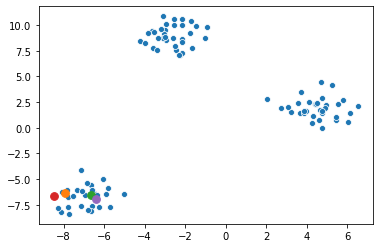

In [13]:
#sns.scatterplot(X[:,0],X[:,1])
#for center in model.cluster_centers_:
#    plt.scatter(center[0],center[1], s=60)

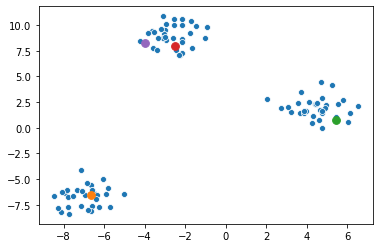

In [20]:
#sns.scatterplot(X[:,0],X[:,1])
#for center in model.cluster_centers_:
#   plt.scatter(center[0],center[1], s=60)

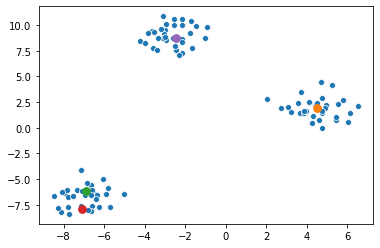

In [44]:
sns.scatterplot(X[:,0],X[:,1])
for center in model.cluster_centers_:
   plt.scatter(center[0],center[1], s=60)